# DATA STORYTELLING

In this project we will try to find some trends, important features and interesting aspects from the data with the help of visualisation tools.

In [1]:
# Necessary imports and reading data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")



In [2]:
df=pd.read_csv('E:\\TANU\\datasets\\housing price\\train.csv')

## Wrangling

Data wrangling has been detailed in another file. Here, the code is given below.

In [3]:
# Creating list of categories and numeric columns

from pandas.api.types import is_numeric_dtype
numcollist=[col for col in df.drop('Id', axis=1).columns if is_numeric_dtype(df[col]) ]
ordlist=[col for col in numcollist if df[col].nunique() < 16 ]
ordlist.append('YearBuilt')
ordlist.append('YearRemodAdd')
ordlist.append('GarageYrBlt')
for col in ordlist:
    numcollist.remove(col)
categlist=[col for col in df.drop('Id', axis=1).columns if not is_numeric_dtype(df[col])]

categlist=categlist+ ordlist

# Nan Imputation
df[numcollist]=df[numcollist].replace(0, np.nan).interpolate(kind='linear',limit_direction='both')
df[categlist]=df[categlist].fillna('Absent')

## Trends in Housing Area
We can study the trends in Area defined by following variables:
 'GarageArea'-Size of garage in square feet
 'GrLivArea'-Above grade (ground) living area square feet
 'TotalBsmtSF'-Total square feet of basement area
 'FirstFlrSF'-First Floor square feet
 'MasVnrArea'-Masonry veneer area in square feet

As timeline is long we can capture the trends easily if we look at mean values in every decade.

In [4]:
# Mean area in sq ft. in each decade
df['decade']=df['YearBuilt'].transform(lambda x: (x//10) * 10)
area=df.groupby('decade')[['GrLivArea','1stFlrSF','GarageArea','MasVnrArea','TotalBsmtSF']]
area.mean()


,GrLivArea,1stFlrSF,GarageArea,MasVnrArea,TotalBsmtSF
decade,,,,,
1870,1689.000000,859.000000,621.000000,184.000000,732.000000
1880,2167.428571,1210.142857,490.857143,339.023810,955.428571
1890,2552.666667,1376.000000,612.000000,301.444444,998.833333
1900,1736.333333,1078.800000,488.266667,263.730000,809.333333
1910,1618.034483,948.500000,420.117816,223.535878,812.241379
1920,1289.865979,921.371134,392.419244,230.613787,805.701031
1930,1412.055556,952.592593,387.472222,275.765432,803.629630
1940,1312.443038,922.189873,363.246835,262.437945,855.164557
1950,1272.419162,1203.089820,417.077844,237.046633,1082.715569


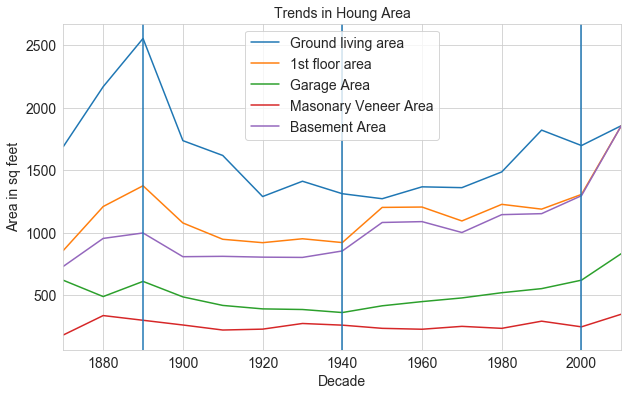

In [5]:
# Plotting mean area in each decade
area.mean().sort_values(by='decade').plot(figsize=(10,6))
plt.axvline(x=1890)
plt.axvline(x=1940)
plt.axvline(x=2000)
plt.xlabel('Decade', fontsize=14)
plt.ylabel('Area in sq feet',fontsize=14)
plt.title('Trends in Houng Area',fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(labels=['Ground living area', '1st floor area','Garage Area', 'Masonary Veneer Area','Basement Area'],fontsize=14)

Observations:
We can see 3 phases: an upward phase(till 1890), a downward and stable phase(till 1940) and an upward again (from 1940)
1890 the avg area of houses were big. Avg Ground living area in 1890 were biggest, which we dont see today. 
We see a downward to a more stable phase till 1940. Increase in avg areas take place from 1940 with steep increase from 2000 onwards.
Masonary Veneer Area shows development from 1920's.


Trend in Mean Sale Price by decade

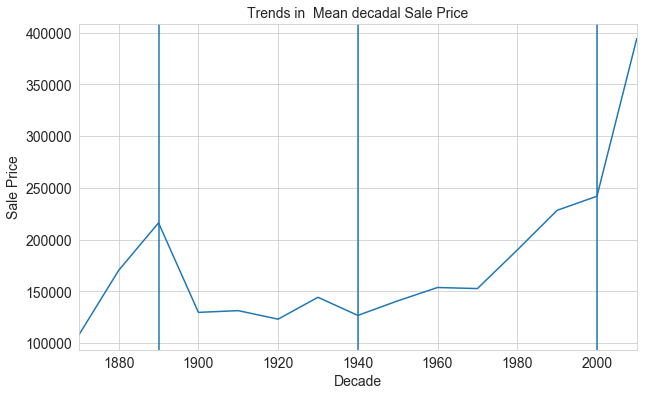

In [6]:
# Plotting mean Sale Price in each decade
price=df.groupby('decade')['SalePrice']
price.mean().plot(figsize=(10,6))
plt.xlabel('Decade',fontsize=14)
plt.ylabel('Sale Price',fontsize=14)
plt.title('Trends in  Mean decadal Sale Price',fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.axvline(x=1890)
plt.axvline(x=1940)
plt.axvline(x=2000)

Avg saleprice spiked to a peak in 1890 followed by a downward to a stable trend till 1940 . From 1940 we see upward trend, with steep increase from 2000. This trend is similar to trends in Housing Area  

## Trends in Features related with Quality

Here we study the trends in following quality related variables:
'OverallQual'-Overall material and finish quality
'ExterQual'-Exterior material quality
'Kitchen Qual'-Kitchen quality
'FireplaceQu'-Fireplace quality

Text(0.5, 1.0, 'Avg Saleprice vs Quality')

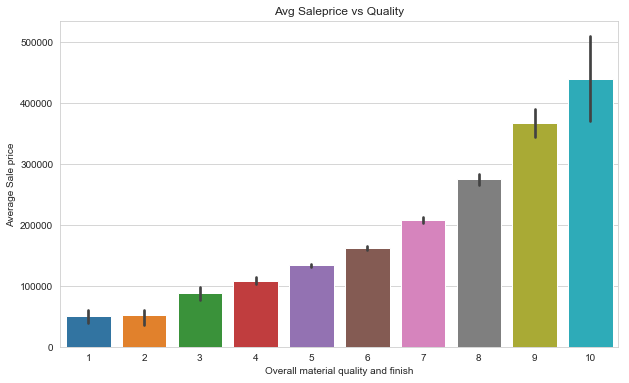

In [7]:
# Barplot of variable, 'OverallQual'
plt.figure(figsize=(10,6))
df=df.sort_values(by=('OverallQual'))
sns.barplot(x='OverallQual', y='SalePrice', data=df)
plt.xlabel('Overall material quality and finish')
plt.ylabel('Average Sale price')
plt.title('Avg Saleprice vs Quality')

As clearly seen from Ovaerall Qual category 1 to category 10, the average Sale price per category is increasing.

Text(0.5, 1.0, 'Trends in Overall material quality and finish')

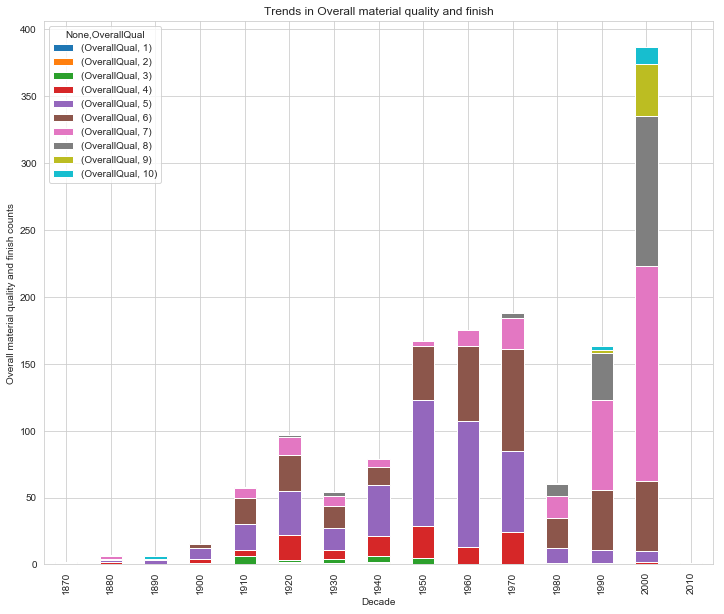

In [8]:
# Barplot of variable, 'OverallQual' in each decade
overallqual=pd.DataFrame(df.groupby('decade')['OverallQual'].value_counts())
overallqual.unstack(1).plot(kind='bar', figsize=(12,10),stacked=True)
plt.xlabel('Decade')
plt.ylabel('Overall material quality and finish counts')
plt.title('Trends in Overall material quality and finish')

Observations:
1. Decade 2000 has only categories 5 to 10.
2. From decade 1990 to 2000 we find a substantial increase in counts of OverallQual category 9(this category was non existent before that).
3. From decade 1990 to 2000 we find a substantial increase in counts of OverallQual category 10(this category was non existent before that).
4. Similarly from decade 1970 to 2000 we find a substantial increase in counts of OverallQual category 8(this category was almost non existent before that).
5. From decade 1960 to 2000 we find a substantial increase in counts of OverallQual category 7.
6. A steady count of category 6 is there in all decades.
7. Category 6 has a commanding presence in all decades with a sudden decline from 1980.
8. Other quality categories- 1,2, 3 dont appear or are rare in counts.

In the Sale price trend we noticed 3 phases: an upward phase(till 1890), a downward and stable phase(till 1940) and an upward again (from 1940) with a steep rise from 2000.
The changes in quality aspects dring these phases in 1890, 1940 and 2000 are:
1. There has not been much of quality description till 1890
2. From decade of 1890 to decade  of1940, quality categories 5,4, and 6 are leading in counts with some appearance of category 7 and 3
3. From decade of 1940 till decade 2000, quality category 7 is increased and leading in count followed by development in counts of categories 8, 9 and 10.
4. Quality category 6 has increased in count while 5 and 4 have drastically reduced.


Text(0.5, 1.0, 'Trend in Exterior material quality')

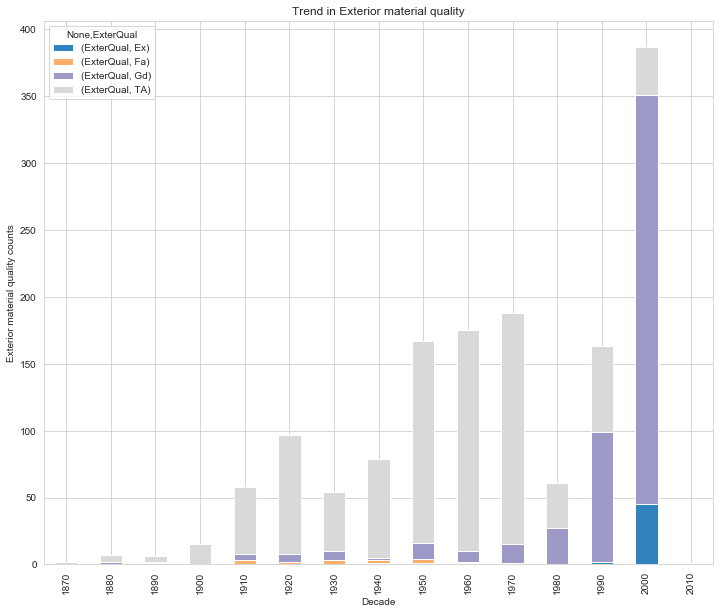

In [9]:
# Barplot of variable, 'ExterQual' in each decade

exterqual=pd.DataFrame(df.groupby('decade')['ExterQual'].value_counts())
exterqual.unstack(1).plot(kind='bar', figsize=(12,10),stacked=True, cmap='tab20c')
plt.xlabel('Decade')
plt.ylabel('Exterior material quality counts')
plt.title('Trend in Exterior material quality')


Observation:
1. In decade of 1890 this quality parameter barely existed with very few counts of category TA.
2. In ExterQual, catergory TA had been showing the highest counts followed by a downward and sluggish numbers from decade 1980, with least counts in decade 2000.
3. From a small count we see consistent growth but unusual spike in Gd category in decade of 2000.
4. Almost nonexistent we see sudden appearance of Ex category in the decade on 2000.



Text(0.5, 1.0, 'Avg Saleprice vs exterior material quality')

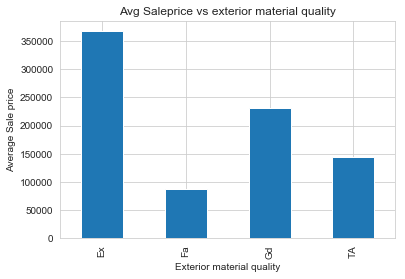

In [10]:
# Barplot of variable, 'ExterQual' .
df.groupby('ExterQual')['SalePrice'].mean().plot(kind='bar')

plt.xlabel('Exterior material quality')
plt.ylabel('Average Sale price')
plt.title('Avg Saleprice vs exterior material quality')

Rare Category Ex has the highest avg Saleprice followed by category Gd

Text(0.5, 1.0, 'Trends in Kitchen quality')

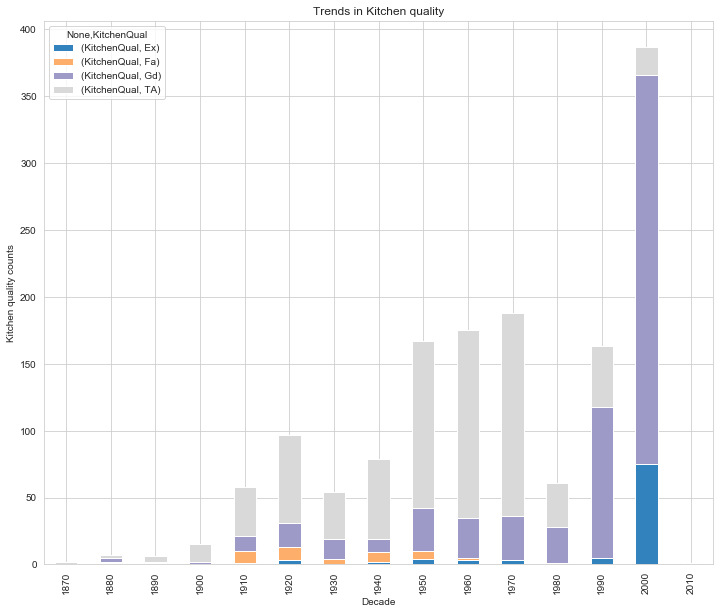

In [11]:
# Barplot of variable, 'KitchenQual' in each decade
kitchenqual=pd.DataFrame(df.groupby('decade')['KitchenQual'].value_counts())
kitchenqual.unstack(1).plot(kind='bar', figsize=(12,10),stacked=True, cmap='tab20c')
plt.xlabel('Decade')
plt.ylabel('Kitchen quality counts')
plt.title('Trends in Kitchen quality')


Observations in Kitchen quality trend is similar to Exterior material quality.

Text(0.5, 1.0, 'Avg Saleprice vs kitchen quality')

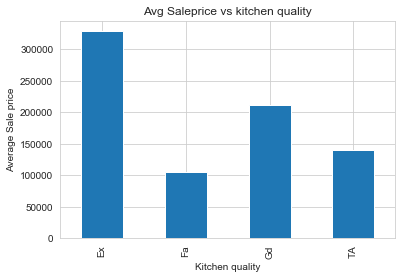

In [12]:
# Barplot of variable, 'KitchenQual' vs Avg Saleprice.
df.groupby('KitchenQual')['SalePrice'].mean().plot(kind='bar')
plt.xlabel('Kitchen quality')
plt.ylabel('Average Sale price')
plt.title('Avg Saleprice vs kitchen quality')

Observations in avg sale price of Kitchen quality is similar to Exterior material quality.

Text(0.5, 1.0, 'Trends in Fireplace quality')

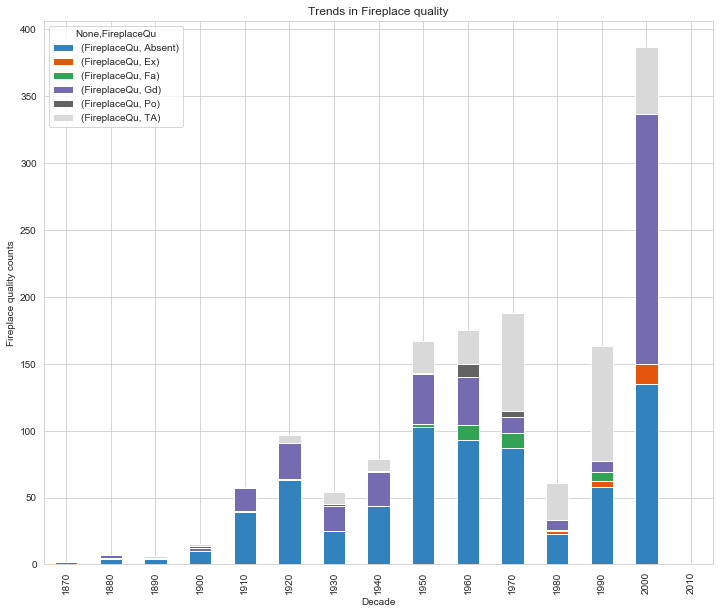

In [13]:
# Barplot of variable, 'FireplaceQu' in each decade

fireplacequ=pd.DataFrame(df.groupby('decade')['FireplaceQu'].value_counts())
fireplacequ.unstack(1).plot(kind='bar', figsize=(12,10),stacked=True, cmap='tab20c')
plt.xlabel('Decade')
plt.ylabel('Fireplace quality counts')
plt.title('Trends in Fireplace quality')

Observations:
1. We see unusual spike and lead in counts of Gd category in decade of 2000  which appears in all previous decades with a low in decade of 1980
2. Almost negligible Ex category have higher counts in 2000
3. TA Category is consistent throughout the period
4. Po category is not there since 1970


Text(0.5, 1.0, 'Avg Saleprice vs Fireplace quality')

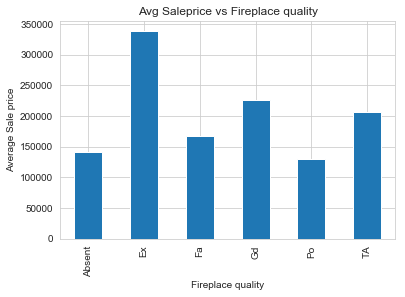

In [14]:
# Barplot of variable, 'KitchenQual' vs average Sale price
df.groupby('FireplaceQu')['SalePrice'].mean().plot(kind='bar')
plt.xlabel('Fireplace quality')
plt.ylabel('Average Sale price')
plt.title('Avg Saleprice vs Fireplace quality')

Rare category Ex has the highest avg Saleprice, followed by consistent categories Gd and TA.

## Trends in 'Neighborhood'

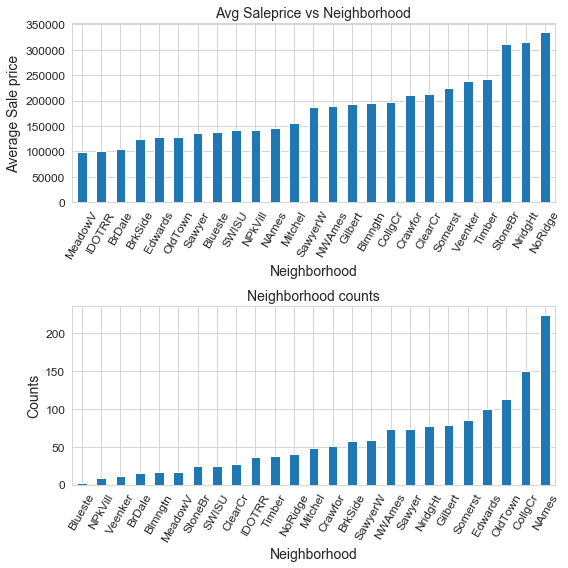

In [15]:
# Plotting Average Saleprice vs Neighborhood and its counts.
plt.subplot(2,1,1)
df.groupby('Neighborhood')['SalePrice'].mean().sort_values().plot(kind='bar', figsize=(8,8) )
plt.xticks(rotation=60,fontsize=12)
plt.yticks( fontsize=12)
plt.xlabel('Neighborhood', fontsize=14)
plt.ylabel('Average Sale price', fontsize=14)
plt.title('Avg Saleprice vs Neighborhood', fontsize=14)
plt.subplot(2,1,2)
df['Neighborhood'].value_counts().sort_values().plot(kind='bar')
plt.xticks(rotation=60, fontsize=12)
plt.yticks( fontsize=12)
plt.xlabel('Neighborhood', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.title('Neighborhood counts', fontsize=14)
plt.tight_layout()

Observations:
1. Average Concentration Neighborhood having average house price range of 180000 to 220000:
NndgHt, Gilbert, Somerst, Sawyer, NWAmesSawyerW  are in counts of 65 to 80 and have an avg Sale price of 180000 to 220000 with Nndght having a high sale price of 320000.
2. High Concentration Neighborhood:
Edwards, OldTown, CollgCr, NAmes have counts from 100 to 230 have avg price of 125000 to 140000. CollGr has Avg price of 200000
3. High price Neighborhood:
StoneBr, NridgHt, NoRidge have avg price from 300000 and in low counts of less than 50. NridgHt has a count of 75. 

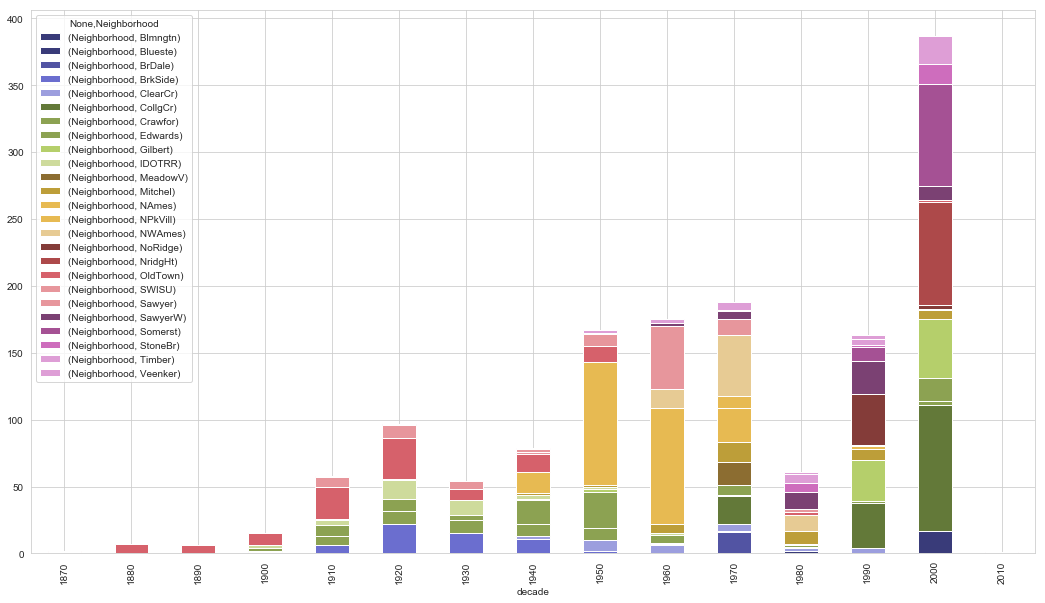

In [16]:
# Plotting variable Neighborhood for each decade.
neighborhood=pd.DataFrame(df.groupby('decade')['Neighborhood'].value_counts())
neighborhood.unstack(1).plot(kind='bar', figsize=(18,10),stacked=True, cmap='tab20b')


Observations:
1. NoRidge was in high count in decade of 1990 and the same reduced drastically in decade of 2000.
2. We see development of NrigHT in decade of 2000.
3. Sawyer has been in modest counts in range of 30 since decade of 1980 till 2000.
4. Concentration of Somerst increased from 1990 to 2000 and leads in counts in 2000.
5. CollgCr has been since decade of 1970's and leads in counts in 2000.



## Target Variable - Sale Price
Trends , percentage changes and related variables.

Text(0.5, 1.0, 'Yearly trend in SalePrice')

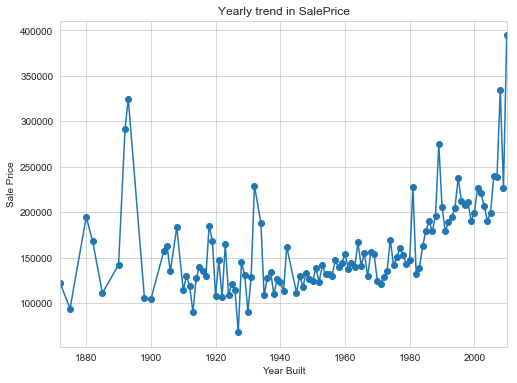

In [17]:
# Plotting yearly trend in SalePrice
df.groupby('YearBuilt')['SalePrice'].median().plot(marker='o', figsize=(8,6))
plt.xlabel('Year Built')
plt.ylabel('Sale Price')
plt.title('Yearly trend in SalePrice')

We can notice the yearly fluctuations as noted earlier in phases- before 1900, 1900 to 1940, 1940 to 2000 and thereafter. We can get a soother curve if we plot by decade and and notice the phases.

Text(0.5, 1.0, 'Decadal trend in SalePrice')

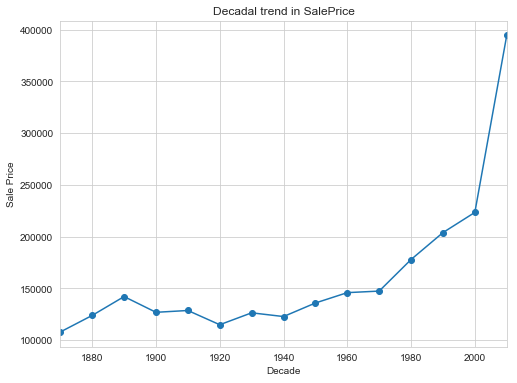

In [18]:
# Plotting Decadal trend in SalePrice
df.groupby('decade')['SalePrice'].median().plot(marker='o', figsize=(8,6))
plt.xlabel('Decade')
plt.ylabel('Sale Price')
plt.title('Decadal trend in SalePrice')

In [19]:
# Computing highest percentage change in Sale price for 1 year window
df.groupby('YearBuilt')['SalePrice'].mean().pct_change().sort_values(ascending=False).head()

YearBuilt
1880    1.134253
1892    1.048172
1932    0.842546
1928    0.639804
1981    0.516262
Name: SalePrice, dtype: float64

Highest % increase in 1 yr is in 1880 of 113%

In [20]:
#Computing  highest percentage change in Sale Price for 3 years window
df.groupby('YearBuilt')['SalePrice'].mean().pct_change(periods=3).sort_values(ascending=False).head()

YearBuilt
1893    1.921348
1934    1.131181
1892    0.733631
1981    0.552411
1916    0.547316
Name: SalePrice, dtype: float64

Highest % increase in 1 yr is in 1893 of 190%

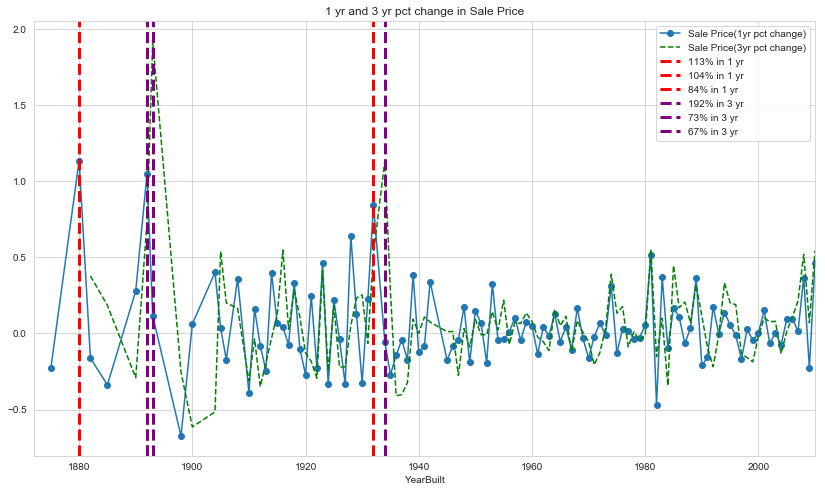

In [21]:
# Plotting highest percantage changes in Sale Price.
plt.figure(figsize=(14,8))
df.groupby('YearBuilt')['SalePrice'].mean().pct_change().plot(marker='o', label= 'Sale Price(1yr pct change)' )
df.groupby('YearBuilt')['SalePrice'].mean().pct_change(periods=3).plot(color='green', style='--', label='Sale Price(3yr pct change)')
plt.axvline(1880, linewidth=3,linestyle='--' ,color='red', label='113% in 1 yr') 
plt.axvline(1892, linewidth=3,linestyle='--' ,color='red', label='104% in 1 yr' )
plt.axvline(1932, linewidth=3,linestyle='--' ,color='red', label='84% in 1 yr')
plt.axvline(1893, linewidth=3,linestyle='--' ,color='purple', label='192% in 3 yr') 
plt.axvline(1934, linewidth=3,linestyle='--' ,color='purple', label='73% in 3 yr' )
plt.axvline(1892, linewidth=3,linestyle='--' ,color='purple', label='67% in 3 yr')
plt.title('1 yr and 3 yr pct change in Sale Price')
plt.legend()
plt.show()

The highest 1 yr and 3 yr % increase are close to each other as seen above, in yr. 1882, 1892 and 1893.
And then in we see the next set of increase in 1932 and 1934.

In [22]:
#Computing  lowest percentage change in Sale Price for 1 year window
df.groupby('YearBuilt')['SalePrice'].mean().pct_change().sort_values(ascending=False).tail(5)

YearBuilt
1885   -0.337798
1910   -0.389869
1982   -0.470146
1898   -0.673846
1872         NaN
Name: SalePrice, dtype: float64

The highest % decrease in sale price in 1 year is in 1898 of -67%

In [23]:
#Computing  lowest percentage change in Sale Price for 3 years window
df.groupby('YearBuilt')['SalePrice'].mean().pct_change(periods=3).sort_values(ascending=False).tail(8)

YearBuilt
1912   -0.348955
1937   -0.402201
1936   -0.409111
1904   -0.515385
1900   -0.613759
1872         NaN
1875         NaN
1880         NaN
Name: SalePrice, dtype: float64

The highest % decrease in sale price in 3 years is in 1900 of -61%

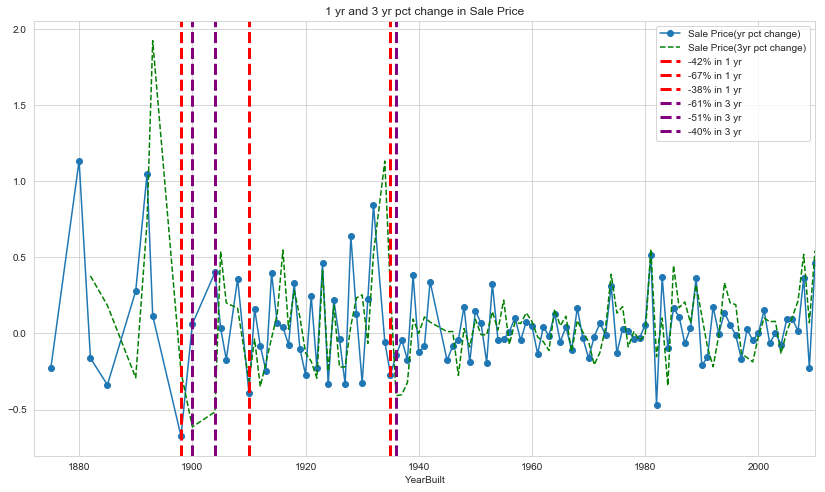

In [24]:
# Plotting lowest percentage change in Sale Price.
plt.figure(figsize=(14,8))
df.groupby('YearBuilt')['SalePrice'].mean().pct_change().plot(marker='o', label= 'Sale Price(yr pct change)' )
df.groupby('YearBuilt')['SalePrice'].mean().pct_change(periods=3).plot(color='green', style='--', label='Sale Price(3yr pct change)')
plt.axvline(1935, linewidth=3,linestyle='--' ,color='red', label='-42% in 1 yr') 
plt.axvline(1898, linewidth=3,linestyle='--' ,color='red', label='-67% in 1 yr' )
plt.axvline(1910, linewidth=3,linestyle='--' ,color='red', label='-38% in 1 yr')
plt.axvline(1900, linewidth=3,linestyle='--' ,color='purple', label='-61% in 3 yr') 
plt.axvline(1904, linewidth=3,linestyle='--' ,color='purple', label='-51% in 3 yr' )
plt.axvline(1936, linewidth=3,linestyle='--' ,color='purple', label='-40% in 3 yr' )
plt.title('1 yr and 3 yr pct change in Sale Price')
plt.legend()
plt.show()

These highest percentage falls follows the highest percentage highs in sale prices in a short period.
As seen, there are minor fluctuations throughout the period but in the following time periods the fluctuations were the highest ever.
The time periods where the highs in sale prices were followed by lows are:
    1. 1880 to 1885
    2. 1892 to 1912
    3. 1934 to 1937


Now let's take a look at Sale Price, its range(and see if we can categorise in different range such as low, mid and high). 

In [25]:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

We see that mean is 180000.
Lower and upper quartiles are 130000 and 214000.

Let's find the outliers. We can find the outliers by passing the z score condition i.e values that are more than  3 standard deviations away from mean.

In [26]:
df[(df['SalePrice']-df['SalePrice'].mean())/df['SalePrice'].std()>3]['SalePrice'].sort_values().head(5)

664     423000
1142    424870
389     426000
496     430000
349     437154
Name: SalePrice, dtype: int64

As seen, the first value in sale price that falls in the condition of zscore >3 is 423000.

In [27]:
lowprice=df[df['SalePrice']<=130000]
midprice=df[(df['SalePrice']>130000) & (df['SalePrice']<=420000)]
highprice=df[df['SalePrice']>420000]

We have categorised the Sale price in three different levels using the quartile values- low price, mid price, high price. We  cannot ingore the ouliers, so we have given it a high price category. We can plot these levels now.

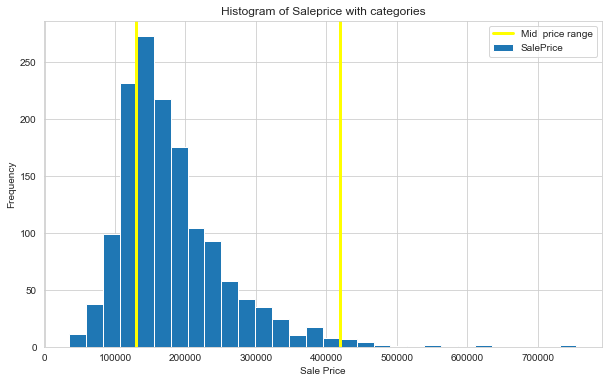

In [28]:
# Plotting SalePrice histogram to view the range
plt.figure(figsize=(10,6))
df['SalePrice'].plot.hist(bins=30)
plt.axvline(130000, color='yellow', linewidth=3, label='Mid  price range' )
plt.axvline(420000, color='yellow', linewidth=3)
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.title('Histogram of Saleprice with categories')
plt.legend()

The prices in between the 2 yellow lines(the quartiles), represent the mid price category. Prices below the first yellow line, is the low price category and prices above the second yellow line high price category. 

Now let's see how the variables are related with different categories of Sale Price.

First, we look at the low price category.

In [29]:
# Computing correlation in low price range
lowprice.drop('Id', axis=1).corr()['SalePrice'].sort_values(ascending=False).head(10)

SalePrice       1.000000
OverallQual     0.440513
OverallCond     0.348168
1stFlrSF        0.315328
BedroomAbvGr    0.304042
GrLivArea       0.289614
GarageCars      0.275235
TotalBsmtSF     0.268086
TotRmsAbvGrd    0.236288
YearBuilt       0.224305
Name: SalePrice, dtype: float64

In [30]:
lowprice.drop('Id', axis=1).corr()['SalePrice'].sort_values(ascending=False).tail(5)

LowQualFinSF   -0.051032
BsmtUnfSF      -0.056427
OpenPorchSF    -0.063240
YrSold         -0.090717
PoolArea             NaN
Name: SalePrice, dtype: float64

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2]),
 <a list of 7 Text yticklabel objects>)

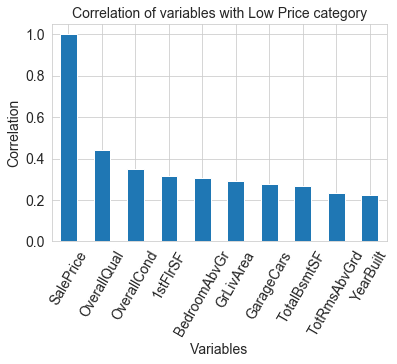

In [31]:
# Plotting the correlated variables in low price range
lowprice.drop('Id', axis=1).corr()['SalePrice'].sort_values(ascending=False).head(10).plot(kind='bar')
plt.xlabel('Variables',fontsize=14)
plt.ylabel('Correlation',fontsize=14)
plt.title('Correlation of variables with Low Price category',fontsize=14)
plt.xticks(rotation=60, fontsize=14)
plt.yticks(fontsize=14)


For the low price category, there are'nt any variables having a correlation of .5 or more with Sale price. At more that .3 correlation we have Overall Material quality and finish(Overall Qual), OverallCond, and TotalBsmtSF (Basement Area).

In [32]:
# Computing correlation in mid price range
midprice.drop('Id', axis=1).corr()['SalePrice'].sort_values(ascending=False).head(10)

SalePrice       1.000000
OverallQual     0.745282
GrLivArea       0.595502
GarageCars      0.592527
GarageArea      0.566852
1stFlrSF        0.481401
TotalBsmtSF     0.479664
FullBath        0.440512
YearRemodAdd    0.425357
TotRmsAbvGrd    0.415260
Name: SalePrice, dtype: float64

In [33]:
midprice.drop('Id', axis=1).corr()['SalePrice'].sort_values(ascending=False).tail(5)

MiscVal        -0.042029
BsmtHalfBath   -0.095134
MSSubClass     -0.110748
KitchenAbvGr   -0.133114
OverallCond    -0.162813
Name: SalePrice, dtype: float64

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2]),
 <a list of 7 Text yticklabel objects>)

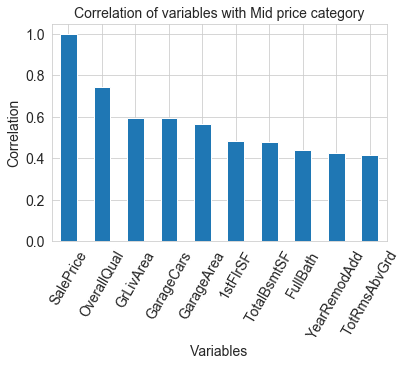

In [34]:
# Plotting the correlated variables in mid price range
midprice.drop('Id', axis=1).corr()['SalePrice'].sort_values(ascending=False).head(10).plot(kind='bar')
plt.xlabel('Variables',fontsize=14)
plt.ylabel('Correlation',fontsize=14)
plt.title('Correlation of variables with Mid price category',fontsize=14)
plt.xticks(rotation=60,fontsize=14)
plt.yticks(fontsize=14)

There are 2 variables which have around .5 correlation with Saleprice in the Mid price category - OverallQual (Over all material quality and finish- 0.54) and FullBath (Full Bathrooms - 0.50). The OverallQual category 6 has the highest counts followed by category 5. In FullBath, category 2 has the highest counts followed by category 1. Other variables that have a .3 plus correlation with sale price are : Year built, Garage Cars, Ground living area and YearRemodAdd(Remodel date)

In [35]:
# Computing correlation of variables with Sale Price in High price range
highprice.drop('Id', axis=1).corr()['SalePrice'].sort_values(ascending=False).head(10)

SalePrice       1.000000
GrLivArea       0.684414
2ndFlrSF        0.624086
LotFrontage     0.620781
BsmtHalfBath    0.546620
PoolArea        0.524055
FullBath        0.442836
Fireplaces      0.418480
OverallQual     0.345543
MasVnrArea      0.342161
Name: SalePrice, dtype: float64

In [36]:
highprice.drop('Id', axis=1).corr()['SalePrice'].sort_values(ascending=False).tail(5)

MoSold         -0.278676
BsmtFinSF2     -0.318713
OpenPorchSF    -0.324589
YearRemodAdd   -0.379231
KitchenAbvGr         NaN
Name: SalePrice, dtype: float64

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2]),
 <a list of 7 Text yticklabel objects>)

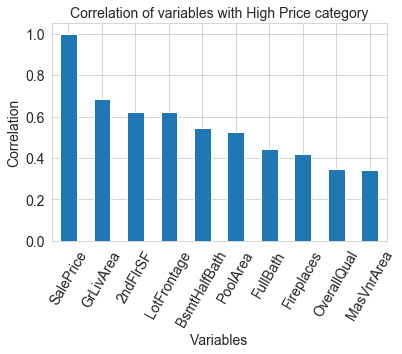

In [37]:
# Plotting the correlated variables in high price range
highprice.drop('Id', axis=1).corr()['SalePrice'].sort_values(ascending=False).head(10).plot(kind='bar')
plt.xlabel('Variables',fontsize=14)
plt.ylabel('Correlation',fontsize=14)
plt.title('Correlation of variables with High Price category',fontsize=14)
plt.xticks(rotation=60, fontsize=14)
plt.yticks(fontsize=14)


OverallQual (0.58)has the highest correlation with Sale price in this category. OverallQual category 8 has the highest value counts followed by category 7. Other variables that have a .3 plus correlation with sale price are :  Garage Cars, TotalBsmtSF (basement area), FirstFlrSF(First floor area),Garage Area, MasVnrArea(Masonary veneer area) and ground living area.

There are several variables that are related to Sale price in the very high price category.
Vaiable with more that .5 correlation are Ground living area, LotFrontage( Linear feet of street connected to property), BsmtHalfBath(Basement half bath- category 0) and Pool Area.
Other variable with > .3 correlation are: SecondFlrSF(second floor area), FullBath, Fireplaces and OverallQual

In [38]:
# Creating labels for different range in Sale Price
df.loc[df['SalePrice']<=130000, 'saleprice_cat']=1
df.loc[(df['SalePrice']>130000) & (df['SalePrice']<=420000), 'saleprice_cat' ]=2
#train.loc[(train['SalePrice']>214000) & (train['SalePrice']<=420000), 'saleprice_cat']=3
df.loc[df['SalePrice']>420000, 'saleprice_cat']=3



In [39]:
# Plotting the maximum categorical values for each Sale price range
df2=df.pivot_table( columns='saleprice_cat', values= categlist, aggfunc='max')

df2.to_excel('categorical.xlsx')
df2

saleprice_cat,1.0,2.0,3.0
Alley,Pave,Pave,Absent
BedroomAbvGr,6,8,4
BldgType,TwnhsE,TwnhsE,1Fam
BsmtCond,TA,TA,TA
BsmtExposure,No,No,No
BsmtFinType1,Unf,Unf,Unf
BsmtFinType2,Unf,Unf,Unf
BsmtFullBath,2,3,1
BsmtHalfBath,2,2,1
BsmtQual,TA,TA,TA


In [40]:
# Plotting the mean numerical values for each Sale price range
df3=df.pivot_table( columns='saleprice_cat', values=numcollist, aggfunc='mean')

df3.to_excel('numeric.xlsx')
df3.round()

saleprice_cat,1.0,2.0,3.0
1stFlrSF,912.0,1234.0,2013.0
2ndFlrSF,712.0,829.0,1094.0
3SsnPorch,203.0,201.0,179.0
BsmtFinSF1,541.0,682.0,1292.0
BsmtFinSF2,399.0,406.0,425.0
BsmtUnfSF,566.0,634.0,813.0
EnclosedPorch,151.0,152.0,153.0
GarageArea,395.0,530.0,842.0
GrLivArea,1120.0,1628.0,2863.0
LotArea,7724.0,11349.0,18066.0
